<a href="https://colab.research.google.com/github/velickovski/colaboratoryProjects/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Laboratory Exercise - Run Mode (8 points)

## Introduction
The analysis of Spotify songs, characterized by a rich set of features such as danceability, energy, and valence, holds significant importance in the realm of music research, entertainment, and data-driven decision-making. Understanding the musical attributes of songs through data analysis provides valuable insights into user preferences, genre trends, and the overall landscape of the music industry. This type of analysis contributes to personalized recommendations for users, enhancing their music discovery experience. Moreover, it aids music producers and artists in tailoring their creations to align with popular trends and audience preferences. Additionally, the exploration of Spotify song data has the potential to uncover patterns, correlations, and anomalies that can inform marketing strategies, playlist curation, and even influence the strategic planning of music events. Overall, the analysis of Spotify songs is instrumental in leveraging data to enhance user experiences, guide artistic endeavors, and inform strategic decisions within the dynamic and ever-evolving music industry.

## The Spotify Songs Dataset

## Downloading the Spotify Songs Dataset

In [ ]:
!gdown 1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_ # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1ayxWv-hlQdzGoHMnrtNWRae9YxlTFP-_
To: /content/spotify-songs.csv
100% 1.82M/1.82M [00:00<00:00, 98.5MB/s]


## Exploring the Spotify Songs Dataset
The dataset consists of information on more than 30,000 songs obtained from the Spotify API, with various musical features and genres. The features include danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo, and genre. Each feature provides insights into different aspects of the songs, such as danceability, intensity, loudness, presence of spoken words, acoustic nature, instrumental content, live performance likelihood, musical positiveness, tempo, and genre. All these features except 'genre' serve as input variables for potential analysis and modeling. The 'genre' attribute serves as the target variable, representing the song genre to be predicted. The dataset offers a comprehensive collection of attributes, making it suitable for exploring and understanding the musical characteristics of a diverse range of songs.

Load the dataset into a `pandas` data frame.

In [ ]:
df = pd.read_csv('spotify-songs.csv')
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,0.748,0.916,-2.634,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,pop
1,0.726,NaN,-4.969,0.0373,0.072400,NaN,0.3570,0.6930,99.972,pop
2,0.675,0.931,-3.432,0.0742,0.079400,NaN,0.1100,0.6130,124.008,pop
3,0.718,0.930,-3.778,0.1020,0.028700,0.000009,0.2040,0.2770,NaN,pop
4,0.650,0.833,-4.672,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,pop
...,...,...,...,...,...,...,...,...,...,...
32828,0.428,NaN,-1.814,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,edm
32829,0.522,0.786,-4.462,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,edm
32830,0.529,0.821,-4.899,0.0481,0.108000,NaN,0.1500,0.4360,127.989,edm
32831,0.626,NaN,NaN,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,edm


Encode the target variable using the `LabelEncoder` from the `scikit-learn` library.

In [ ]:
target_column = 'genre'

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit and transform the target variable
df[target_column + '_encoded'] = label_encoder.fit_transform(df[target_column])

# Display the DataFrame with the encoded target variable
df.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,genre_encoded
0,0.748,0.916,-2.634,0.0583,0.1020,0.000000,0.0653,0.518,122.036,pop,2
1,0.726,NaN,-4.969,0.0373,0.0724,NaN,0.3570,0.693,99.972,pop,2
2,0.675,0.931,-3.432,0.0742,0.0794,NaN,0.1100,0.613,124.008,pop,2
3,0.718,0.930,-3.778,0.1020,0.0287,0.000009,0.2040,0.277,NaN,pop,2
4,0.650,0.833,-4.672,0.0359,0.0803,0.000000,0.0833,0.725,123.976,pop,2




```
# This is formatted as code
```

Explore the dataset using visualizations of your choice.

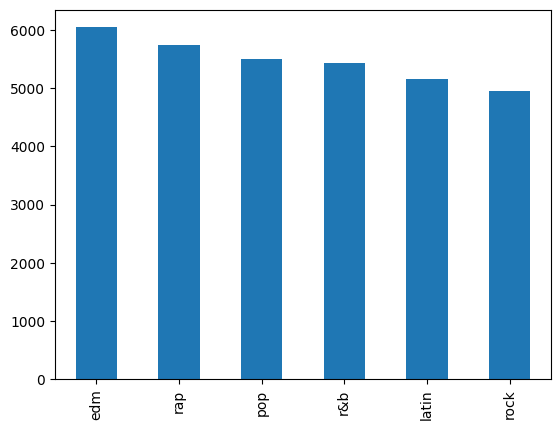

In [ ]:
df['genre'].value_counts().plot.bar()
plt.show()



```
# This is formatted as code
```

Check if the dataset is balanced.

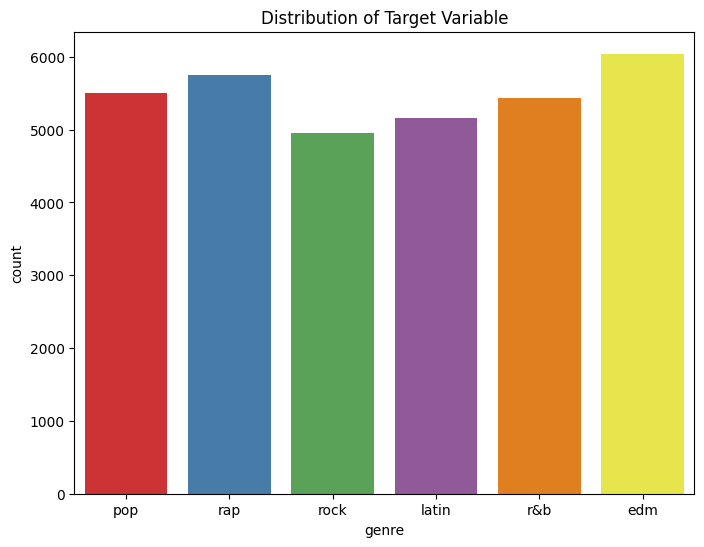

Class counts:
edm      6043
rap      5746
pop      5507
r&b      5431
latin    5155
rock     4951
Name: genre, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'target_column_encoded' is the encoded target variable column
target_column_encoded = 'genre'

# Create a countplot to visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column_encoded, data=df, palette='Set1')
plt.title('Distribution of Target Variable')
plt.show()
class_counts = df[target_column_encoded].value_counts()
print("Class counts:")
print(class_counts)


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [ ]:
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a DataFrame to display the results
missing_info = pd.DataFrame({'Column': df.columns, 'Missing Percentage': missing_percentage})

# Display the missing information
print(missing_info.head(9))


                            Column  Missing Percentage
danceability          danceability           11.153413
energy                      energy           34.297810
loudness                  loudness           23.208357
speechiness            speechiness            7.190936
acousticness          acousticness            2.722870
instrumentalness  instrumentalness           19.705784
liveness                  liveness            9.094509
valence                    valence           22.809369
tempo                        tempo           19.970761


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

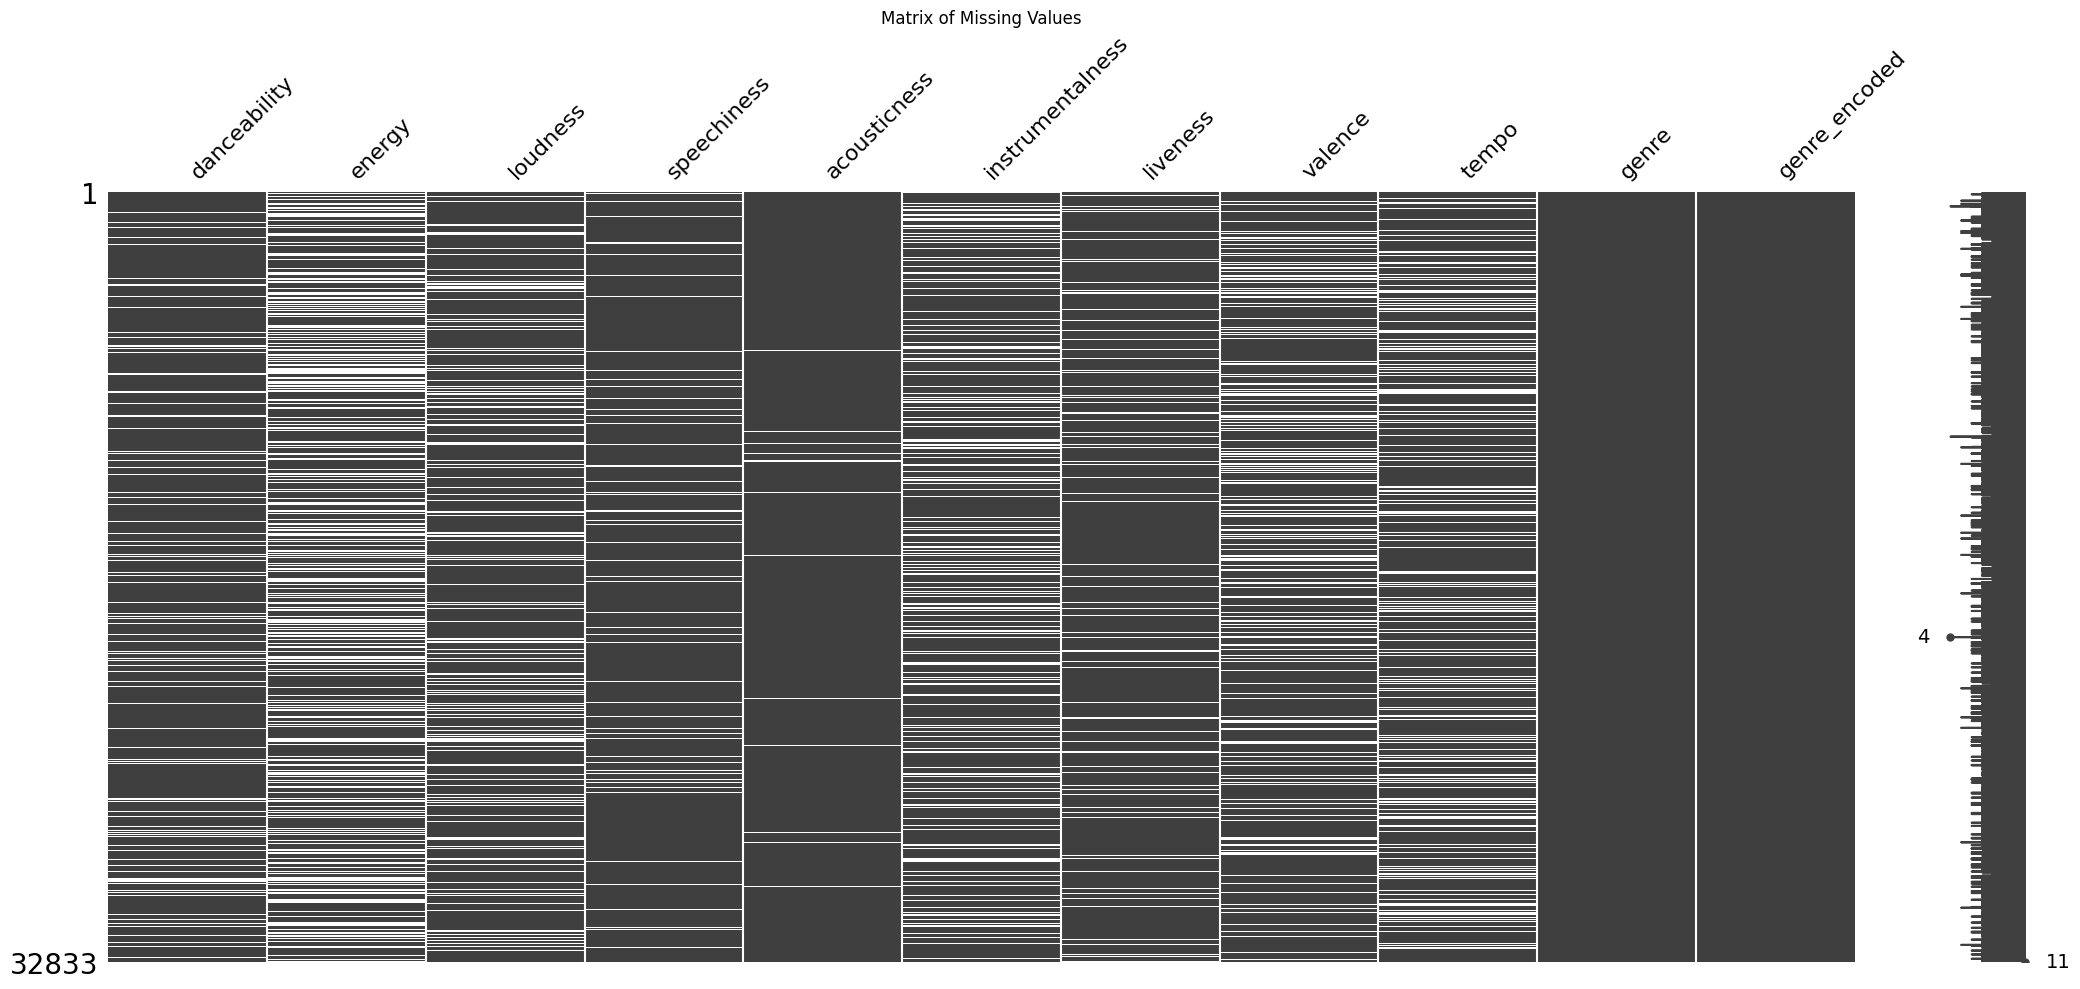

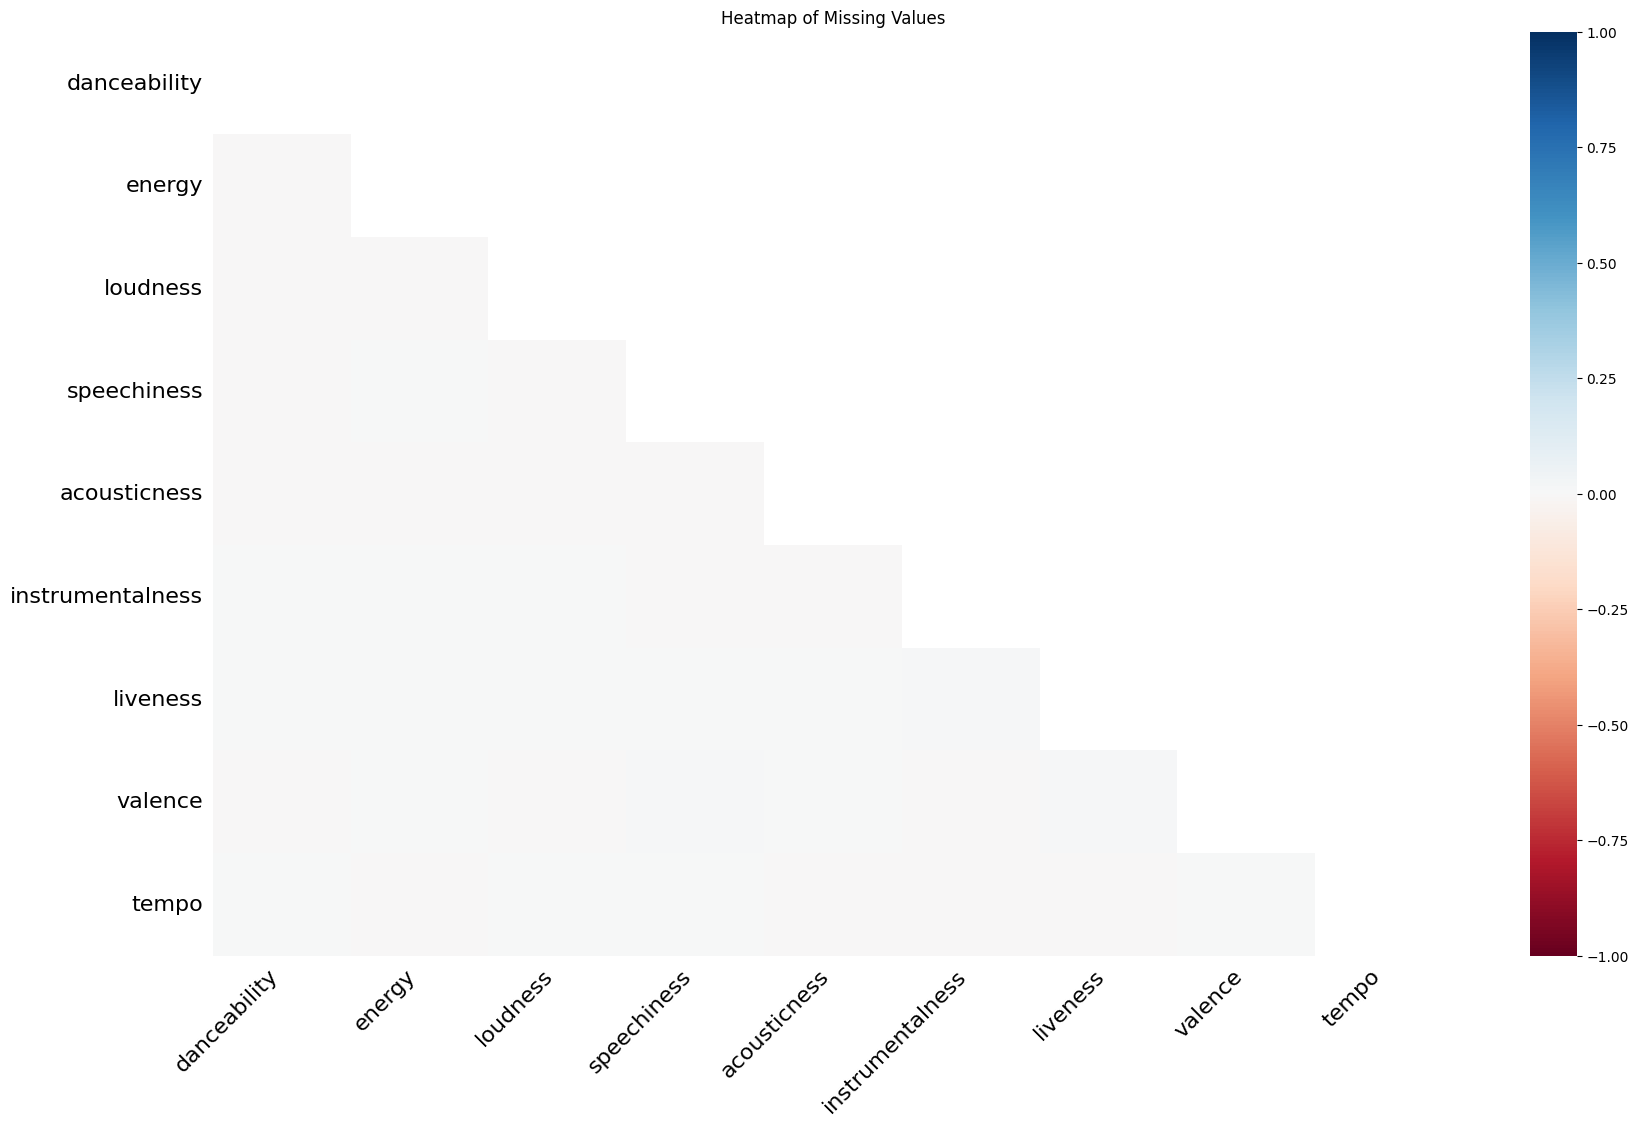

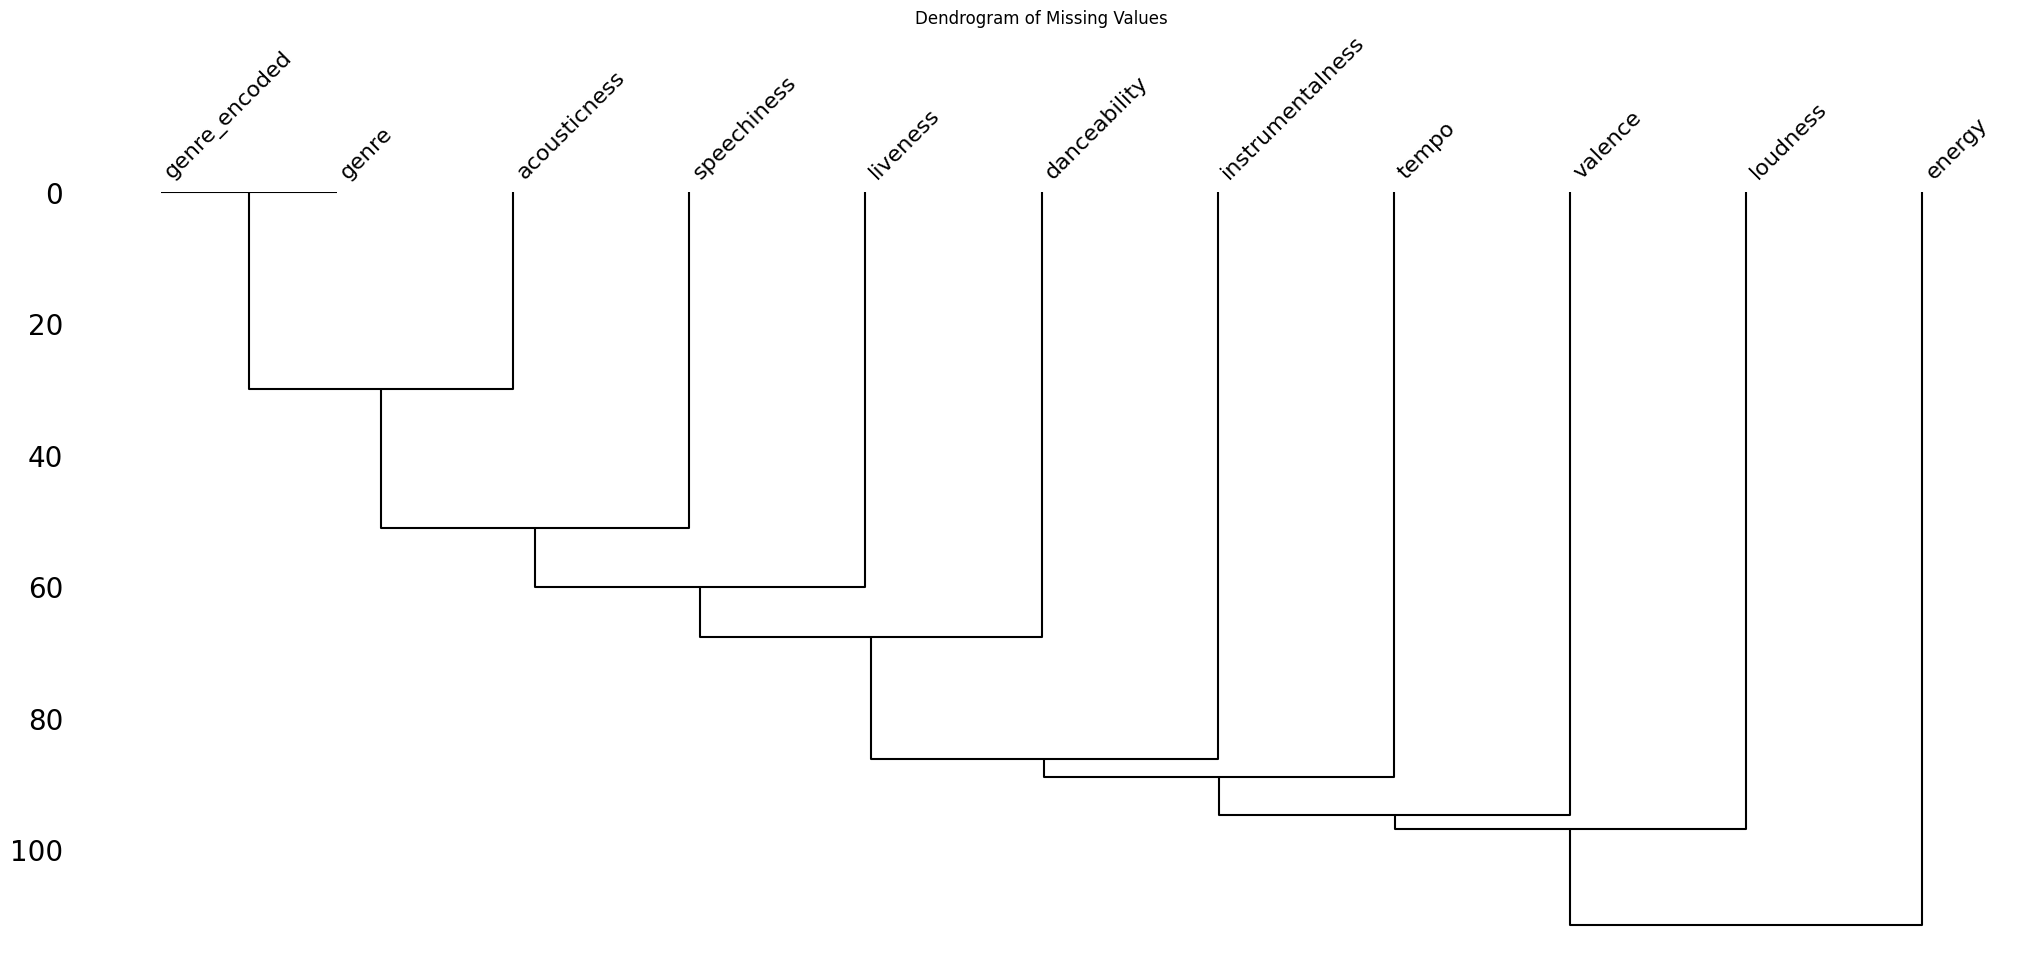

In [ ]:
!pip install missingno  # Install missingno if not already installed

import missingno as msno

# Visualize the distribution of missing values using a matrix
msno.matrix(df)
plt.title('Matrix of Missing Values')
plt.show()

# Visualize the correlation between missing values using a heatmap
msno.heatmap(df)
plt.title('Heatmap of Missing Values')
plt.show()

# Visualize the dendrogram of missing values
msno.dendrogram(df)
plt.title('Dendrogram of Missing Values')
plt.show()


## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [ ]:
# Drop rows with any missing values
df_cleaned = df.dropna()

# Drop columns with any missing values
df_cleaned = df.dropna(axis=1)

# Fill missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Fill missing values with the median of each column
df_imputed = df.fillna(df.median())

# Fill missing values with the mode of each column
df_imputed = df.fillna(df.mode().iloc[0])

# Assuming df is your original DataFrame
imputer = IterativeImputer(initial_strategy='mean')  # You can choose 'mean', 'median', or 'most_frequent'
df_imputed_array = imputer.fit_transform(df['genre'])

# Convert the NumPy array to a DataFrame
df_imputed = pd.DataFrame(df_imputed_array, columns=df.columns)


<ipython-input-38-364368c392ef>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = df.fillna(df.mean())
<ipython-input-38-364368c392ef>:11: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_imputed = df.fillna(df.median())


ValueError: ignored

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a cross-validation with grid search. This involves systematically experimenting with various values for `n_neighbors` and evaluating the model's performance using cross-validation. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `MinMaxScaler`.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.